In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset

In [2]:
data = pd.read_excel(r'C:\Users\user\Downloads\iris_(1).xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Explore the data

In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 3. Check for null values and handle it (if any)

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

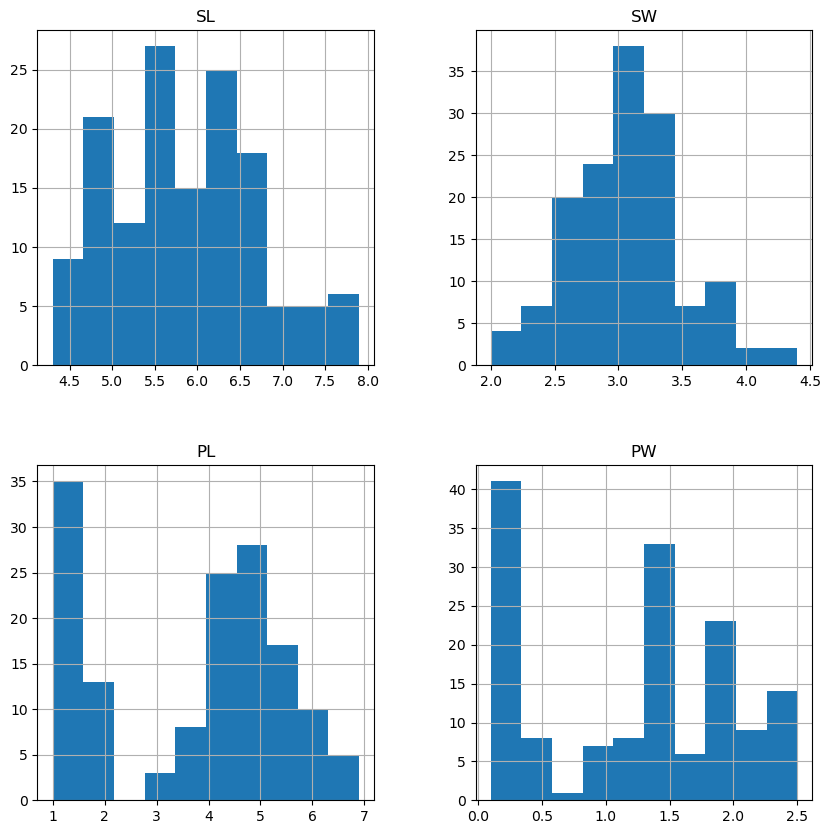

In [7]:
freq_graph = data.select_dtypes(include = 'float')
freq_graph.hist(figsize = [10,10])
plt.show()

In [8]:
for i in['SL','SW']:
  data[i]= data[i].fillna(data[i].mean())

In [9]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 4. Perform Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
data['Classification'] = le.fit_transform(data['Classification'])

In [14]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# 5. Split the data to independent and dependent feature (Classification)

In [15]:
x = data.drop(['Classification'], axis = 1)
y = data['Classification']

In [16]:
x.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

# 6. Scale the data

In [18]:
x.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x = scaler.fit_transform(x)

In [22]:
type(x)

numpy.ndarray

In [23]:
x = pd.DataFrame(x)

In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
x.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,3.315866e-16,-3.789561e-16,0.000000,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-1.930976e+00,-2.495522e+00,-1.612857,-1.444450e+00
25%,-8.140476e-01,-5.929136e-01,-1.264758,-1.181504e+00
50%,-6.942837e-02,-1.172615e-01,0.330694,1.332259e-01
75%,6.751909e-01,5.367602e-01,0.765817,7.905908e-01
max,2.536739e+00,3.212303e+00,1.810113,1.710902e+00


In [26]:
x.columns = ['SL', 'SW', 'PL', 'PW']

In [27]:
x.head()

,SL,SW,PL,PW
0,-0.938151,1.071869,-1.380791,-1.312977
1,-1.186357,-0.117261,-1.380791,-1.312977
2,0.000000,0.358391,-1.438808,-1.312977
3,-1.558667,0.120565,-1.322775,-1.312977
4,-1.062254,1.309695,-1.380791,-1.312977


# 6. Split the data to training and testing data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 7. Train and Evaluate Logistic Regression algorithm

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
model = lr.fit(x_train, y_train)

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
logreg_accuracy = accuracy_score(y_test, y_pred)

In [36]:
print('Accuracy of logistc regression is ',logreg_accuracy )

Accuracy of logistc regression is  0.9666666666666667


# 8. Train and Evaluate KNN algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
metric_k = []
neighbors = np.arange(3,15)

In [39]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train, y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_predictions)
    metric_k.append(acc)

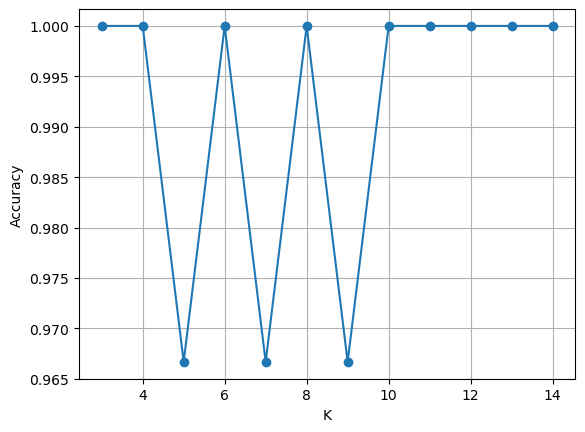

In [40]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 14, metric = 'euclidean')
classifier.fit(x_train, y_train)
y_predictions = classifier.predict(x_test)
knn_accuracy =  accuracy_score(y_test,y_predictions)
print('Accuracy of KNN model is ',knn_accuracy)

Accuracy of KNN model is  1.0


#  9. Train and Evaluate SVM algorithm

In [42]:
from sklearn.svm import SVC

In [43]:
svm_clf = SVC(kernel = 'linear')

In [44]:
svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [45]:
y_prediction = svm_clf.predict(x_test)

In [46]:
svm_accuracy = accuracy_score(y_test, y_prediction)

In [47]:
print('Accuracy of SVM model is ',svm_accuracy)

Accuracy of SVM model is  0.9666666666666667


# 10. Train and Evaluate Decision Tree algorithm

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_clf = DecisionTreeClassifier()

In [50]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
y_prediction = dt_clf.predict(x_test)

In [52]:
dt_accuracy =  accuracy_score(y_test,y_prediction)

In [53]:
print('Accuracy of Decision Tree is ', dt_accuracy)

Accuracy of Decision Tree is  1.0


# 11. Train and Evaluate Random Forest algorithm

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_clf = RandomForestClassifier()

In [56]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rf_clf.predict(x_test)

In [58]:
rf_accuracy = accuracy_score(y_test, y_pred)

In [59]:
print('Accuracy of Random Forest is ', rf_accuracy)

Accuracy of Random Forest is  1.0


# 12. Finding the best model

In [66]:
best_model = max([logreg_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy])
best_model 

1.0

In [68]:
print('Here Random Forest, Decision Tree and KNN algorithms are giving a maximum accuracy of 1.0')

Here Random Forest, Decision Tree and KNN algorithms are giving a maximum accuracy of 1.0
